# Solve the TSP using ACO algorithm

Iteration 1/200 — Best length: 417.9539
Iteration 21/200 — Best length: 388.1978
Iteration 41/200 — Best length: 386.4297
Iteration 61/200 — Best length: 386.4297
Iteration 81/200 — Best length: 386.4297
Iteration 101/200 — Best length: 386.4297
Iteration 121/200 — Best length: 386.4297
Iteration 141/200 — Best length: 386.4297
Iteration 161/200 — Best length: 386.4297
Iteration 181/200 — Best length: 386.4297
Iteration 200/200 — Best length: 386.4297

ACO Results:
Time taken: 3.54 seconds
Best tour length: 386.4297
Best tour: [4, 12, 0, 16, 5, 3, 13, 8, 11, 7, 2, 18, 9, 15, 10, 14, 6, 19, 1, 17]


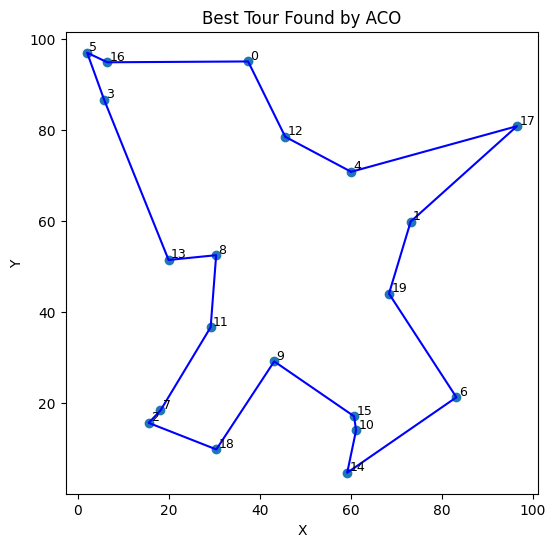

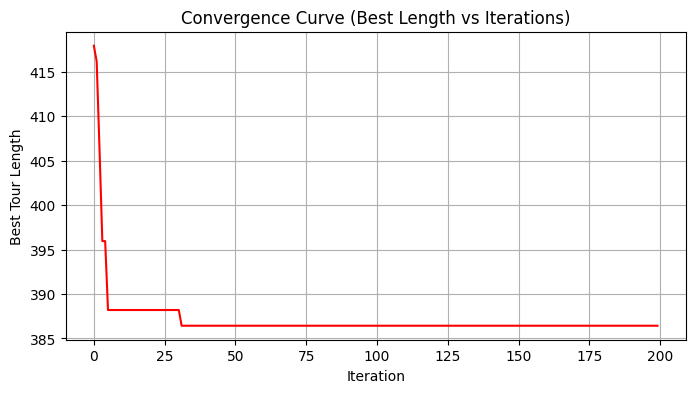

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
from math import sqrt

# ---------------- Utility Functions ---------------- #
def euclidean_distance(a, b):
    return sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)

def create_distance_matrix(coords):
    n = len(coords)
    D = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if i == j:
                D[i, j] = np.inf
            else:
                D[i, j] = euclidean_distance(coords[i], coords[j])
    return D

def initialize_pheromone_matrix(n, tau0):
    return np.full((n, n), tau0)

def choose_next_city(probabilities):
    r = random.random()
    cum = 0.0
    for i, p in enumerate(probabilities):
        cum += p
        if r <= cum:
            return i
    return len(probabilities) - 1

def build_solution(pheromone, distance, alpha, beta):
    n = pheromone.shape[0]
    tour = []
    start = random.randrange(n)
    tour.append(start)
    visited = set(tour)
    current = start
    while len(tour) < n:
        denom = 0.0
        probs = np.zeros(n)
        for j in range(n):
            if j in visited:
                probs[j] = 0.0
            else:
                probs[j] = (pheromone[current, j]**alpha) * ((1.0 / distance[current, j])**beta)
                denom += probs[j]
        if denom == 0:
            choices = [j for j in range(n) if j not in visited]
            next_city = random.choice(choices)
        else:
            probs = probs / denom
            next_city = choose_next_city(probs)
        tour.append(next_city)
        visited.add(next_city)
        current = next_city
    return tour

def tour_length(tour, distance):
    L = 0.0
    for i in range(len(tour) - 1):
        L += distance[tour[i], tour[i + 1]]
    L += distance[tour[-1], tour[0]]  # Return to start
    return L

# ---------------- ACO Core Algorithm ---------------- #
def aco_tsp(coords, n_ants=20, n_iterations=200, alpha=1.0, beta=5.0, rho=0.5, Q=100.0, tau0=None, verbose=True):
    n = len(coords)
    D = create_distance_matrix(coords)
    if tau0 is None:
        tau0 = 1.0 / (n * np.mean(D[np.isfinite(D)]))
    pheromone = initialize_pheromone_matrix(n, tau0)
    best_tour = None
    best_length = float('inf')
    history = []

    for it in range(n_iterations):
        all_tours = []
        all_lengths = []
        for ant in range(n_ants):
            tour = build_solution(pheromone, D, alpha, beta)
            L = tour_length(tour, D)
            all_tours.append(tour)
            all_lengths.append(L)
            if L < best_length:
                best_length = L
                best_tour = tour.copy()

        pheromone *= (1 - rho)  # Evaporation
        for tour, L in zip(all_tours, all_lengths):  # Deposit
            deposit = Q / L
            for i in range(len(tour) - 1):
                a, b = tour[i], tour[i + 1]
                pheromone[a, b] += deposit
                pheromone[b, a] += deposit
            pheromone[tour[-1], tour[0]] += deposit
            pheromone[tour[0], tour[-1]] += deposit

        history.append(best_length)
        if verbose and (it % max(1, n_iterations // 10) == 0 or it == n_iterations - 1):
            print(f"Iteration {it + 1}/{n_iterations} — Best length: {best_length:.4f}")

    return {
        "best_tour": best_tour,
        "best_length": best_length,
        "history": history,
        "distance_matrix": D
    }

# ---------------- Run Example ---------------- #
if __name__ == "__main__":
    random.seed(42)
    np.random.seed(42)

    n_cities = 20
    coords = np.random.rand(n_cities, 2) * 100  # Random cities

    start_time = time.time()
    result = aco_tsp(coords, n_ants=40, n_iterations=200, alpha=1.0, beta=5.0, rho=0.45, Q=100.0, verbose=True)
    end_time = time.time()

    best_tour = result["best_tour"]
    best_length = result["best_length"]
    history = result["history"]

    print("\nACO Results:")
    print(f"Time taken: {end_time - start_time:.2f} seconds")
    print(f"Best tour length: {best_length:.4f}")
    print("Best tour:", best_tour)

    # Plot the best tour
    plt.figure(figsize=(8, 6))
    xs, ys = coords[:, 0], coords[:, 1]
    plt.scatter(xs, ys)
    for i, (x, y) in enumerate(coords):
        plt.text(x + 0.5, y + 0.5, str(i), fontsize=9)
    path = best_tour + [best_tour[0]]
    plt.plot(coords[path, 0], coords[path, 1], 'b-', lw=1.5)
    plt.title("Best Tour Found by ACO")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    # Plot convergence curve
    plt.figure(figsize=(8, 4))
    plt.plot(history, 'r')
    plt.title("Convergence Curve (Best Length vs Iterations)")
    plt.xlabel("Iteration")
    plt.ylabel("Best Tour Length")
    plt.grid(True)
    plt.show()


# Apply ACO for features selection from a dataset(IRIS dataset) 

Iteration 1/30 — Best Accuracy: 0.9600
Iteration 2/30 — Best Accuracy: 0.9600
Iteration 3/30 — Best Accuracy: 0.9600
Iteration 4/30 — Best Accuracy: 0.9600
Iteration 5/30 — Best Accuracy: 0.9600
Iteration 6/30 — Best Accuracy: 0.9600
Iteration 7/30 — Best Accuracy: 0.9600
Iteration 8/30 — Best Accuracy: 0.9600
Iteration 9/30 — Best Accuracy: 0.9600
Iteration 10/30 — Best Accuracy: 0.9600
Iteration 11/30 — Best Accuracy: 0.9600
Iteration 12/30 — Best Accuracy: 0.9600
Iteration 13/30 — Best Accuracy: 0.9600
Iteration 14/30 — Best Accuracy: 0.9600
Iteration 15/30 — Best Accuracy: 0.9600
Iteration 16/30 — Best Accuracy: 0.9600
Iteration 17/30 — Best Accuracy: 0.9600
Iteration 18/30 — Best Accuracy: 0.9600
Iteration 19/30 — Best Accuracy: 0.9600
Iteration 20/30 — Best Accuracy: 0.9600
Iteration 21/30 — Best Accuracy: 0.9600
Iteration 22/30 — Best Accuracy: 0.9600
Iteration 23/30 — Best Accuracy: 0.9600
Iteration 24/30 — Best Accuracy: 0.9600
Iteration 25/30 — Best Accuracy: 0.9600
Iteration

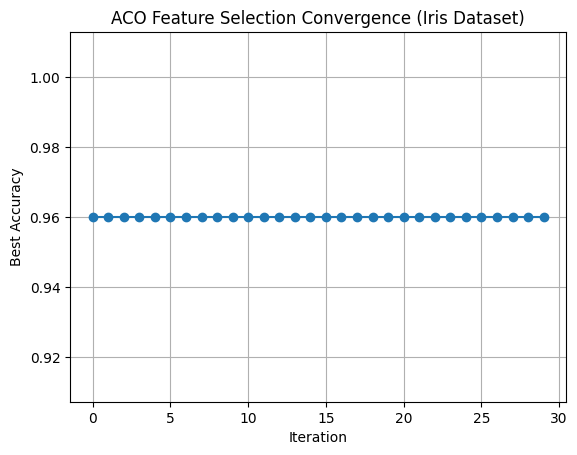

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# ---------------------- ACO Feature Selection ---------------------- #
class ACOFeatureSelection:
    def __init__(self, n_ants=10, n_iterations=30, alpha=1, beta=1, rho=0.3, q=0.9):
        self.n_ants = n_ants
        self.n_iterations = n_iterations
        self.alpha = alpha  # importance of pheromone
        self.beta = beta    # importance of heuristic info
        self.rho = rho      # evaporation rate
        self.q = q          # pheromone addition factor

    def _evaluate_subset(self, X, y, features):
        """Evaluate subset performance using cross-validation accuracy"""
        if np.sum(features) == 0:  # avoid empty subset
            return 0
        selected_features = np.where(features == 1)[0]
        X_sub = X[:, selected_features]
        model = LogisticRegression(max_iter=1000)
        score = cross_val_score(model, X_sub, y, cv=5).mean()
        return score

    def fit(self, X, y):
        n_features = X.shape[1]
        pheromone = np.ones(n_features)
        best_features = None
        best_score = -1
        best_scores = []

        # Heuristic information (we can use variance or correlation here)
        heuristic = np.std(X, axis=0)  # higher std = more informative

        for it in range(self.n_iterations):
            ant_solutions = []
            ant_scores = []

            for ant in range(self.n_ants):
                # Probability of selecting each feature
                probs = (pheromone ** self.alpha) * (heuristic ** self.beta)
                probs = probs / np.sum(probs)

                # Construct feature subset (binary vector)
                features = np.zeros(n_features)
                for i in range(n_features):
                    if np.random.rand() < probs[i]:
                        features[i] = 1

                # Evaluate
                score = self._evaluate_subset(X, y, features)
                ant_solutions.append(features)
                ant_scores.append(score)

                # Update best
                if score > best_score:
                    best_score = score
                    best_features = features.copy()

            # Pheromone update
            pheromone = (1 - self.rho) * pheromone
            for i in range(n_features):
                for j, features in enumerate(ant_solutions):
                    if features[i] == 1:
                        pheromone[i] += self.q * ant_scores[j]

            best_scores.append(best_score)
            print(f"Iteration {it+1}/{self.n_iterations} — Best Accuracy: {best_score:.4f}")

        self.best_features = best_features
        self.best_score = best_score
        self.best_scores = best_scores

    def get_selected_features(self, feature_names=None):
        indices = np.where(self.best_features == 1)[0]
        if feature_names is not None:
            return [feature_names[i] for i in indices]
        else:
            return indices

# ---------------------- Run on Iris Dataset ---------------------- #
if __name__ == "__main__":
    data = load_iris()
    X, y = data.data, data.target
    X = StandardScaler().fit_transform(X)
    feature_names = data.feature_names

    aco = ACOFeatureSelection(n_ants=15, n_iterations=30, alpha=1, beta=1, rho=0.3, q=0.9)
    aco.fit(X, y)

    selected = aco.get_selected_features(feature_names)
    print("\nBest Feature Subset:", selected)
    print(f"Best Classification Accuracy: {aco.best_score:.4f}")

    # Plot convergence curve
    plt.plot(aco.best_scores, marker='o')
    plt.title("ACO Feature Selection Convergence (Iris Dataset)")
    plt.xlabel("Iteration")
    plt.ylabel("Best Accuracy")
    plt.grid(True)
    plt.show()
